<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/Tony/AI_in_Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the start and end dates for the desired time period
start_date = "2021-01-13"
end_date = "2021-08-02"

# Define the stock symbol for GameStop
stock_symbol = "GME"

# Download historical stock price data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the price momentum indicator
data["Returns"] = data["Close"].pct_change()
data["Momentum"] = data["Returns"].rolling(window=10).sum()

# Initialize the momentum and momentum signal columns
data["MomentumSignal"] = "Hold"
data["PriceMomentum"] = ""

# Assign momentum signals and calculate price momentum
data.loc[data["Momentum"] > 0, "MomentumSignal"] = "Positive"
data.loc[data["Momentum"] < 0, "MomentumSignal"] = "Negative"
data.loc[data["Momentum"].notnull(), "PriceMomentum"] = data["Momentum"].map("{:.2%}".format)

# Print the momentum signal and price momentum for each day
print("Date\t\tMomentum Signal\tPrice Momentum")
for index, row in data.iterrows():
    print(f"{index.date()}\t{row['MomentumSignal']}\t\t{row['PriceMomentum']}")


[*********************100%***********************]  1 of 1 completed
Date		Momentum Signal	Price Momentum
2021-01-13	Hold		
2021-01-14	Hold		
2021-01-15	Hold		
2021-01-19	Hold		
2021-01-20	Hold		
2021-01-21	Hold		
2021-01-22	Hold		
2021-01-25	Hold		
2021-01-26	Hold		
2021-01-27	Hold		
2021-01-28	Positive		288.77%
2021-01-29	Positive		329.54%
2021-02-01	Positive		309.82%
2021-02-02	Positive		238.94%
2021-02-03	Positive		242.23%
2021-02-04	Positive		190.13%
2021-02-05	Positive		158.24%
2021-02-08	Positive		134.21%
2021-02-09	Positive		25.36%
2021-02-10	Negative		-107.71%
2021-02-11	Negative		-63.62%
2021-02-12	Negative		-128.95%
2021-02-16	Negative		-103.69%
2021-02-17	Negative		-50.90%
2021-02-18	Negative		-65.01%
2021-02-19	Negative		-23.15%
2021-02-22	Negative		-29.02%
2021-02-23	Negative		-25.34%
2021-02-24	Positive		94.74%
2021-02-25	Positive		111.53%
2021-02-26	Positive		105.30%
2021-03-01	Positive		121.10%
2021-03-02	Positive		124.77%
2021-03-03	Positive		137.06%
2021-03-04	Positi

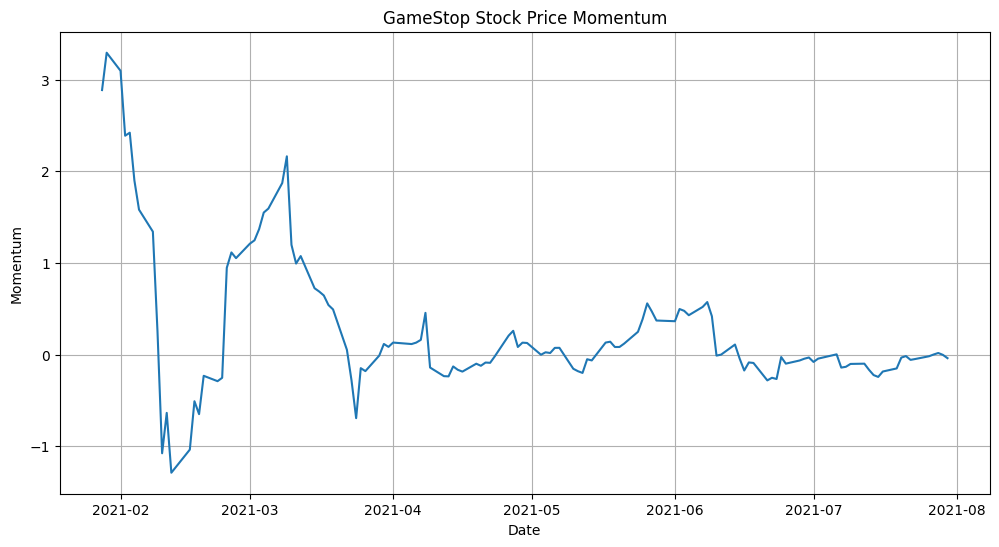

In [ ]:
# Plot the momentum indicator
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Momentum"])
plt.title("GameStop Stock Price Momentum")
plt.xlabel("Date")
plt.ylabel("Momentum")
plt.grid(True)
plt.show()

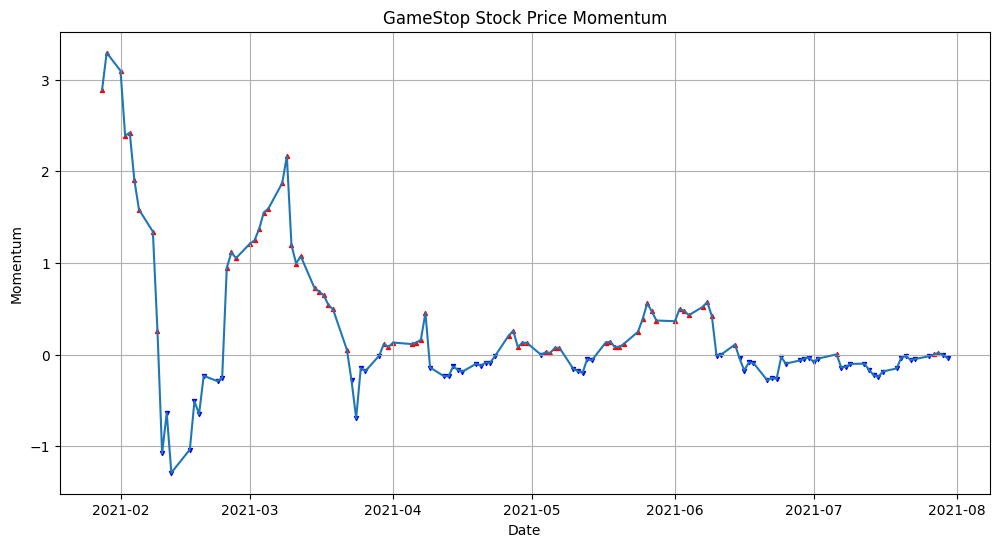

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the momentum indicator
ax.plot(data.index, data["Momentum"])

# Set marker properties for positive and negative momentum
positive_marker = '^'
negative_marker = 'v'
marker_size = 8

# Add marker for positive momentum
positive_momentum = data[data["Momentum"] > 0]
ax.scatter(positive_momentum.index, positive_momentum["Momentum"], color='red',
           marker=positive_marker, s=marker_size)

# Add marker for negative momentum
negative_momentum = data[data["Momentum"] < 0]
ax.scatter(negative_momentum.index, negative_momentum["Momentum"], color='blue',
           marker=negative_marker, s=marker_size)

# Set chart title, labels, and grid
ax.set_title("GameStop Stock Price Momentum")
ax.set_xlabel("Date")
ax.set_ylabel("Momentum")
ax.grid(True)

# Display the chart
plt.show()